# Principal Component Analysis

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model as sk_lm
from sklearn import model_selection as sk_msel
from sklearn import metrics as sk_metrics
from sklearn import preprocessing as sk_pre
from sklearn import decomposition as sk_decomp
import statsmodels.api as sm

### PCA on Arrest Data

In [53]:
df_crime=pd.read_csv('data/USArrests.csv')

In [54]:
df_crime.rename(columns={'Unnamed: 0': 'State'}, inplace=True)
df_crime.set_index('State', inplace=True)
df_crime.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [55]:
df_crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


**-> Mean and Variance of Variables far different -> Need for Standardization**

In [59]:
df_crime_s=pd.DataFrame(sk_pre.StandardScaler().fit_transform(df_crime), index=df_crime.index, columns=df_crime.columns)
df_crime_s.describe()

,Murder,Assault,UrbanPop,Rape
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,-8.437695e-17,1.298961e-16,-4.263256e-16,8.326673e-16
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-1.620693e+00,-1.524362e+00,-2.340661e+00,-1.502548e+00
25%,-8.611383e-01,-7.486054e-01,-7.704502e-01,-6.640245e-01
50%,-1.247758e-01,-1.425453e-01,3.210209e-02,-1.220847e-01
75%,8.029251e-01,9.483628e-01,8.521012e-01,5.330962e-01
max,2.229265e+00,2.015028e+00,1.776781e+00,2.671197e+00


In [60]:
df_crime_s.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


In [98]:
# PCA components
pca=sk_decomp.PCA().fit(df_crime_s)
pd.DataFrame(pca.components_, columns=df_crime.columns)

,Murder,Assault,UrbanPop,Rape
0,0.535899,0.583184,0.278191,0.543432
1,0.418181,0.187986,-0.872806,-0.167319
2,-0.341233,-0.268148,-0.378016,0.817778
3,0.649228,-0.743407,0.133878,0.089024


In [65]:
# Explained Variance
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [95]:
# Cummulated Explained Variance Ratio
cum_vratio=pd.Series([0, *pca.explained_variance_ratio_.cumsum()])
cum_vratio

0    0.000000
1    0.620060
2    0.867502
3    0.956642
4    1.000000
dtype: float64

Text(0, 0.5, 'Cummulated Explained Variance')

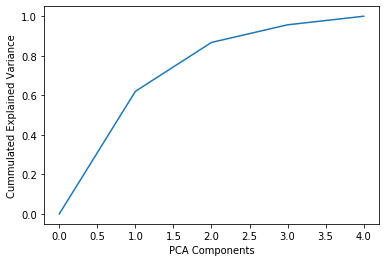

In [96]:
ax=sns.lineplot(data=cum_vratio)
ax.set_xlabel('PCA Components')
ax.set_ylabel('Cummulated Explained Variance')

In [112]:
# Now transform the data to 2-dimensional space by PCA
df_crime2d=pd.DataFrame(sk_decomp.PCA(n_components=2).fit_transform(df_crime_s), 
                        index=df_crime.index,
                        columns=['PCA1', 'PCA2']
                       )
df_crime2d.head()

,PCA1,PCA2
State,,
Alabama,0.985566,1.133392
Alaska,1.950138,1.073213
Arizona,1.763164,-0.745957
Arkansas,-0.141420,1.119797
California,2.523980,-1.542934


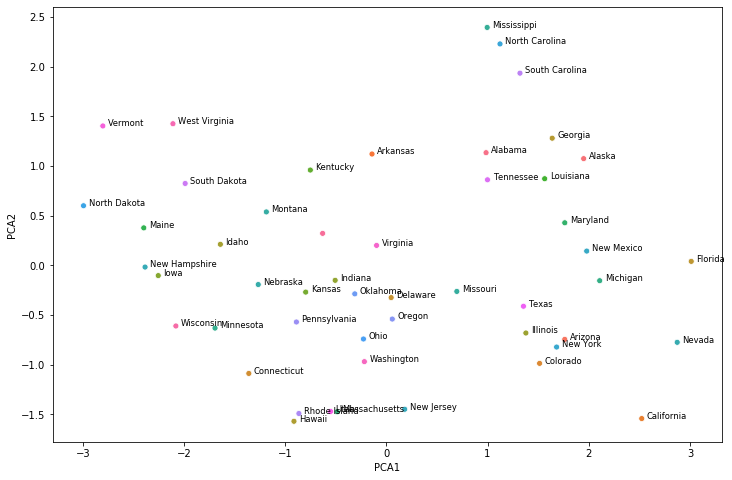

In [159]:
# Visualize two dimensional projection
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax=sns.scatterplot(data=df_crime2d, x='PCA1', y='PCA2', hue=df_crime.index, ax=ax, legend=False)

for k in range(0,len(df_crime2d.index)-1):
     ax.text(df_crime2d.PCA1[k]+0.05, df_crime2d.PCA2[k], 
     df_crime2d.index[k], horizontalalignment='left', 
     size='small', color='black')

### PCA on genomic data

In [124]:
df_g=pd.read_csv('data/NCI60_X.csv')
df_c=pd.read_csv('data/NCI60_y.csv')

In [125]:
# Gene Expressions
df_g.drop(columns=['Unnamed: 0'], inplace=True)
df_g.head()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
0,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654981,...,-0.990019,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285020,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350020,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [126]:
# Cancer types
df_c.drop(columns=['Unnamed: 0'], inplace=True)
df_c.head()

,x
0,CNS
1,CNS
2,CNS
3,RENAL
4,BREAST


In [128]:
# Standardizing
df_g_s=pd.DataFrame(sk_pre.StandardScaler().fit_transform(df_g), index=df_g.index, columns=df_g.columns)

In [138]:
# PCA scores
pca=sk_decomp.PCA().fit(df_g_s)
df_g_pca=pd.DataFrame(pca.transform(df_g_s), index=df_g.index)
df_g_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-19.838042,-3.555636,-9.812399,-0.824246,12.609984,7.471505,14.190730,-3.197977,21.938350,-20.369363,...,-3.571612,-11.111674,6.336264,9.077897,-3.892561,-3.240788,0.446627,0.392266,-0.894904,3.663736e-15
1,-23.089215,-6.441460,-13.478251,5.635308,8.035496,3.715178,10.143225,-7.292724,22.338284,-13.119764,...,3.378131,5.232259,-6.325341,-7.665590,3.938798,4.018298,-0.617127,-0.776330,0.969009,8.437695e-15
2,-27.456114,-2.465143,-3.533054,-1.341673,12.564846,17.344925,10.354857,-2.671282,-0.234926,-6.357967,...,1.299500,5.323021,-4.867172,-0.044978,2.027836,-1.089818,-1.695444,0.498405,-0.844418,-4.649059e-15
3,-42.816801,9.768358,-0.890073,3.445043,42.269904,27.238815,17.520642,-0.554341,14.264354,15.969204,...,-0.342635,-1.117879,2.511719,6.390061,-3.429572,-0.705737,-1.372244,1.427329,0.735637,1.887379e-15
4,-55.418530,5.198897,-21.094558,15.849712,10.443273,12.991051,12.597895,32.513096,-7.896805,-10.177263,...,-0.264565,-2.311955,2.926478,-1.870319,2.295689,0.614378,2.577214,-0.557610,-0.576024,2.220446e-16


In [144]:
# Add cancer type 
df_g_pca['cancer_type']=df_c['x']
df_g_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,cancer_type
0,-19.838042,-3.555636,-9.812399,-0.824246,12.609984,7.471505,14.190730,-3.197977,21.938350,-20.369363,...,-11.111674,6.336264,9.077897,-3.892561,-3.240788,0.446627,0.392266,-0.894904,3.663736e-15,CNS
1,-23.089215,-6.441460,-13.478251,5.635308,8.035496,3.715178,10.143225,-7.292724,22.338284,-13.119764,...,5.232259,-6.325341,-7.665590,3.938798,4.018298,-0.617127,-0.776330,0.969009,8.437695e-15,CNS
2,-27.456114,-2.465143,-3.533054,-1.341673,12.564846,17.344925,10.354857,-2.671282,-0.234926,-6.357967,...,5.323021,-4.867172,-0.044978,2.027836,-1.089818,-1.695444,0.498405,-0.844418,-4.649059e-15,CNS
3,-42.816801,9.768358,-0.890073,3.445043,42.269904,27.238815,17.520642,-0.554341,14.264354,15.969204,...,-1.117879,2.511719,6.390061,-3.429572,-0.705737,-1.372244,1.427329,0.735637,1.887379e-15,RENAL
4,-55.418530,5.198897,-21.094558,15.849712,10.443273,12.991051,12.597895,32.513096,-7.896805,-10.177263,...,-2.311955,2.926478,-1.870319,2.295689,0.614378,2.577214,-0.557610,-0.576024,2.220446e-16,BREAST


In [141]:
# Explained Variance
expvar=pca.explained_variance_

Text(0, 0.5, 'Explained Variance')

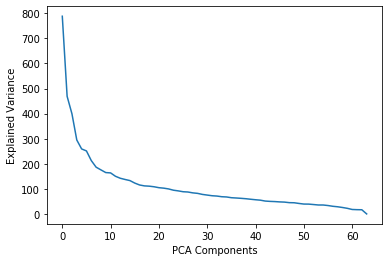

In [143]:
ax=sns.lineplot(data=expvar)
ax.set_xlabel('PCA Components')
ax.set_ylabel('Explained Variance')

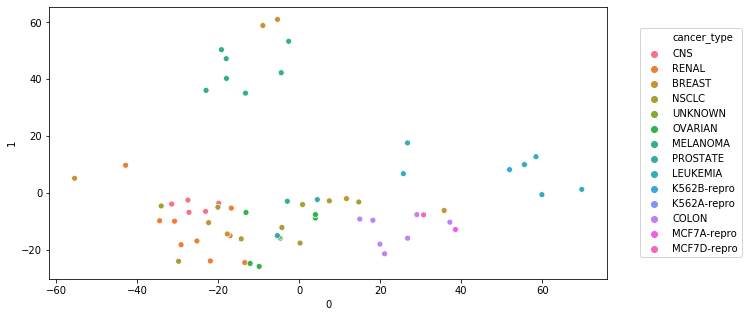

In [147]:
# Visualize first two PCA dimensions
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.scatterplot(data=df_g_pca, x=0, y=1, hue='cancer_type', ax=ax)
ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)